[View in Colaboratory](https://colab.research.google.com/github/harjeevansingh/WhiteWine-EDA/blob/master/WhiteWine_EDA.ipynb)

# Exploratory Data analysis on Red Wine Dataset


The project is aimed at looking and finding deep insights of the white wine dataset. The report also aims in bringing us to a conclusion so as to what are the factors that affect the quality of wine.

The data used is based on the wine quality dataset as recommended by Shreyas Sir. The features of the dataset are as follows , This dataset has 13 variables which contains 9 variables of ingredient, 2 variables of physical properity, 1 variable of quantity and 1 of quality. The dataset are of the size 4989 , 13. The libraries used for the data are , tidyverse and GGally. The libraries are used for visualization which can help us to come to conclusion.


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Data Description

Data description

The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

## Attribute Information
For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests):

1.fixed acidity

2.volatile acidity

3.citric acid

4.residual sugar

5.chlorides

6.free sulfur dioxide

7.total sulfur dioxide

8.density

9.pH

10.sulphates

11.alcohol Output variable (based on sensory data):

12.quality (score between 0 and 10)


![image](https://www.montecreekranchwinery.com/wp-content/uploads/2017/04/wine-lineup-spring-2017-1024x321.png)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/May28thMLbatcj/master/wineQualityWhites.csv")

Now, we will view our imported data frame by making use of the head function to show first 5 rows.

In [5]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
del df["Unnamed: 0"]

In [7]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.shape

(4898, 12)

In [9]:
df.size

58776

In [10]:
df.describe(include="all")

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values.

# Univariate Analysis
Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.


## Fixed.acidity  Count Plot

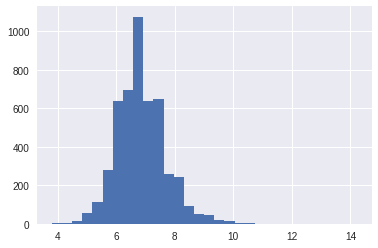

In [12]:
plt.hist(x="fixed.acidity",data=df,bins=30)
sns.despine()

From the above plot, we noticed that:
1.   It is a normal distribution. 
2.   There are few outliers.
3.   It is continuous.
4.   It is bell shaped graph.
5.   Most of the wines have acidity around 7.

## Volatile.acidity Count Plot

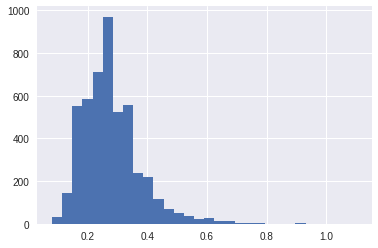

In [13]:
plt.hist(x="volatile.acidity",data=df,bins=30)
sns.despine()

From the above plot we can see that,
1.  It is continuous.
2.  The destribution is skewed.
3.   Most of the wine has 0.25 volatile acidity.
4.   The value of volatile acidity is less for most of the wines.

## Citric.Acid Count Plot

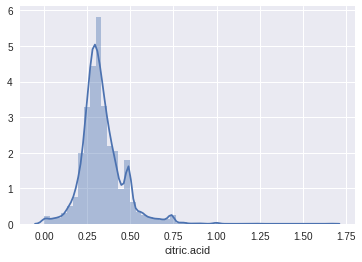

In [14]:
sns.distplot(df["citric.acid"])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


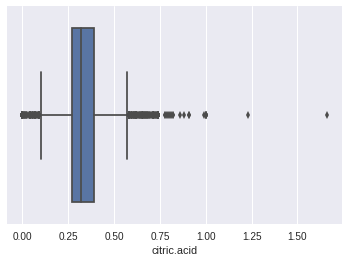

In [15]:
sns.boxplot(df["citric.acid"])
sns.despine()

1. It is continuous.
2. The skewness can be observed.
3.  Most of the wines have citric acid ranging from 0.25 to 0.5.
4.  There are many outliers.

## Residual.sugar Count Plot

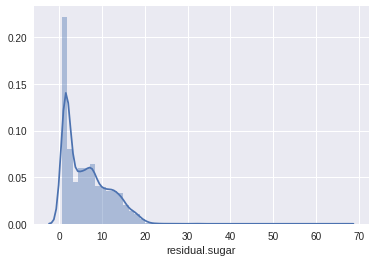

In [16]:
sns.distplot(df["residual.sugar"])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


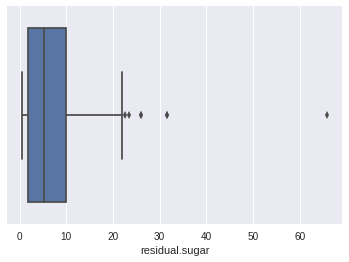

In [17]:
sns.boxplot(df["residual.sugar"])
sns.despine()

It can be seen that,
1.  The graph is skewed.
2.  It is continuous.
3.  Most of the wines have 0 to 10 units of residual sugar.
4.  There are outliers.

## Chloride- Count plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


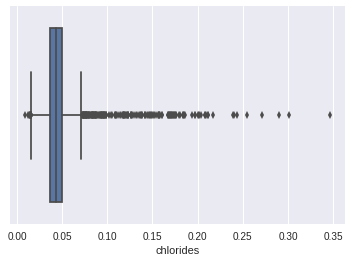

In [18]:
sns.boxplot(df["chlorides"])
sns.despine()

It is observered that ,
1.  The graph is skewed.
2.   It is Continuous.
3.   It has many outliers.
4.   0.05 is the amount of chlorides in most wines.

## Free.sulfur.dioxide - Count plot

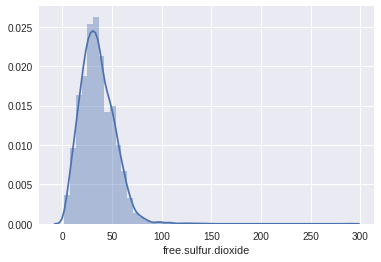

In [19]:
sns.distplot(df["free.sulfur.dioxide"])
sns.despine()

It is seen that,
1. It is continuous.
2. The skewness can be observed.
3.  Most of the wines have citric acid ranging from 0 to 50.
4.  There are many outliers.

## Total.sulfur.dioxide - Count Plot

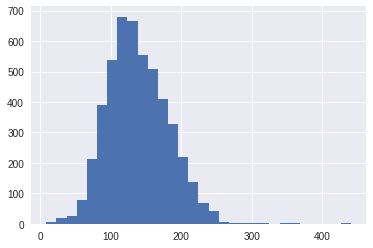

In [20]:
plt.hist(df["total.sulfur.dioxide"],bins=30)
sns.despine()

1.  There are large number of Outliers.
2.  They are continuous in nature.
3.  The distribution is skewed
4.  There are 100-200 total sulfur dioxide in most of the wines. 

## Density - Count Plot

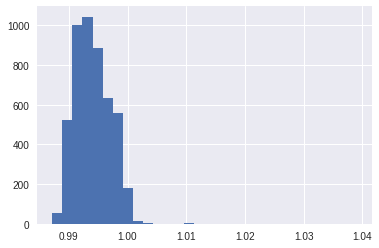

In [21]:
plt.hist(df["density"],bins=30)
sns.despine()

it is seen that,
1.  It is a normal distribution.
2.  There are very few outliers.
3.  Most of the wines have the density between 0.99 to 1.00 .

## pH -  Count Plot

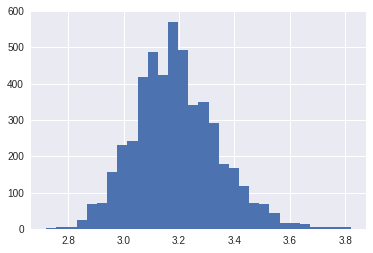

In [22]:
plt.hist(df["pH"],bins=30)
sns.despine()

It can be observed that, 
1.  There are no outliers.
2.  This is normal distribution graph.
3.  Most of the wines have pH value of 3.2

## Sulphates -Count Plot

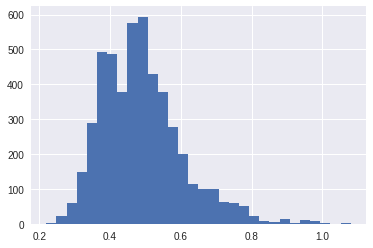

In [23]:
plt.hist(df["sulphates"],bins=30)
sns.despine()

It can be observed that,

## Alcohol - Count Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


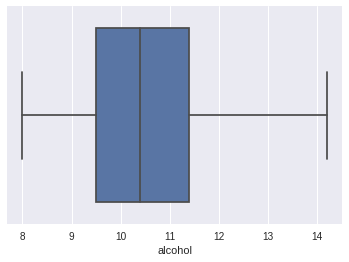

In [24]:
sns.boxplot(df["alcohol"])
sns.despine()

It can seen that ,
1.  It is a skewed graph.
2.  It is continuous.
3. Most of the wines have 10-11% of alcohol.

## Quality - Count Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


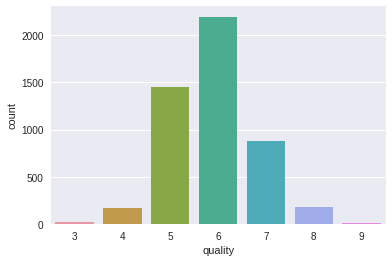

In [25]:
sns.countplot(df["quality"])
sns.despine()

It is observed from above graph that,
1. Most wines are of 6 quality.
2.  We  can see that the best quality wines are very less as compare to average ones.

# Bivariate Analysis


Two variable analysis. We want to find out the relationship between two points. Explore the data.

### Checking the correlation.

In [26]:
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile.acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric.acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual.sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free.sulfur.dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total.sulfur.dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## Heatmap for the correlation

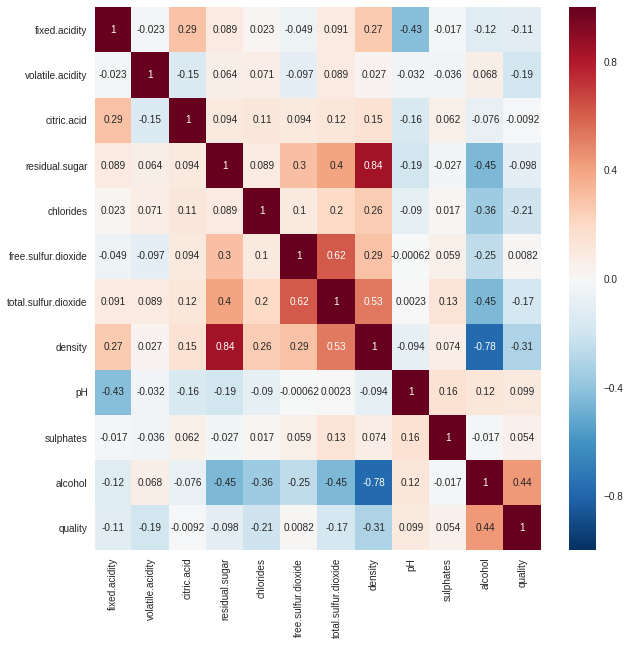

In [27]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Residual Sugar  v/s Density

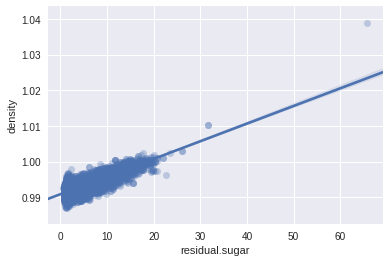

In [28]:
sns.regplot(x="residual.sugar", y = "density",data=df, scatter_kws={'alpha':0.3})
sns.despine()

We can find from the above graph for density and reisdual sugar , Here are our findings ,

1.  Density and reisdual sugar are having correlation coefficient of 0.84
2.  High density wines have more residual sugar.



## Chlorides v/s Alcohol

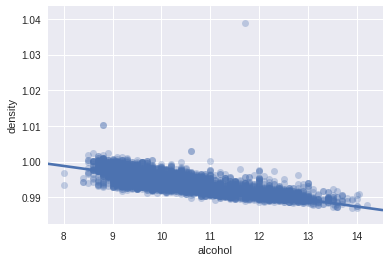

In [29]:
sns.regplot(x="alcohol", y = "density",data=df, scatter_kws={'alpha':0.3})
sns.despine()

It can be observed from the above that,
1.  Chlorides and alcohol sugar are having correlation coefficient of -0.36.
1.  The denser the wine is , lesser percentage of alcohol it has.
2.  Most of the alcohol have density between 0.99 and 1.00 regardless of the alcohol percentage.

## Alcohol v/s Quality

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


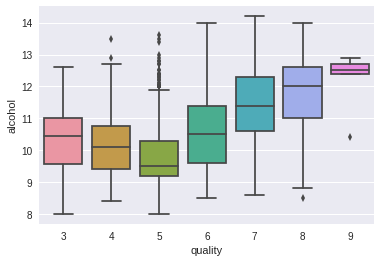

In [30]:
sns.boxplot(x="quality", y = "alcohol",data=df)
sns.despine()

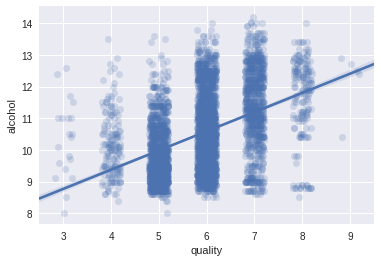

In [31]:
sns.regplot(x="quality", y = "alcohol", x_jitter= 0.2,data=df, scatter_kws={'alpha':0.2})
sns.despine()

It can be observed from the above that,
1.  Quality and alcohol sugar are having correlation coefficient of 0.44.
2.  The better the quality of the wine the more alcohol it contains.
3.  The 5 quality wine has alcohol 9-11% and quality 6 wine has 9 to 13 %.
4.  Most of the wines are of 5 and 6 quality and alcohol % above 9.
5.  We can also see that quality 3 and quality 9 has lesser and greater amount of alcohol in there wine, respectively.

## Quality v/s Density

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


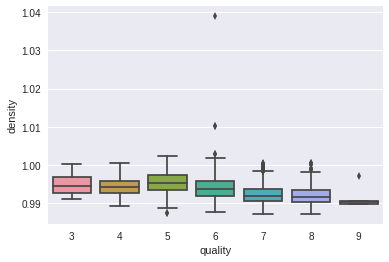

In [32]:
sns.boxplot(x="quality", y = "density",data=df)
sns.despine()

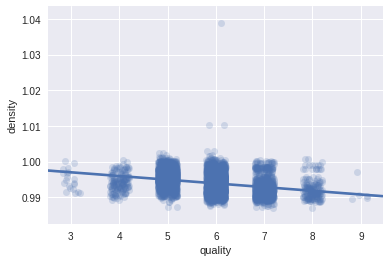

In [33]:
sns.regplot(x="quality", y = "density",x_jitter= 0.2,data=df, scatter_kws={'alpha':0.2})
sns.despine()

It is observed from the above graphs that,
1.  Quality and Density sugar are having correlation coefficient of -0.31.
2.  Higher the quality of the wine higher is the density.
3.  The 5 quality wine has density 9 to 11 and quality 6 wine has 9 to 13%.
4.  The quality 3 wine has lesser density.

## pH v/s Fixed Acidity

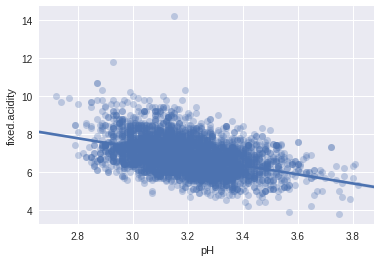

In [34]:
sns.regplot(x="pH", y = "fixed.acidity",data=df, scatter_kws={'alpha':0.3})
sns.despine()

We can see from the above graph that,
1.  pH and Fixed acidity sugar are having correlation coefficient of 0.43.
2.  Lesser the fixed acidity if the wine greater will be its pH value.
3.  Wines with pH value 3.0 to 3.4 have fixed acidity from 5 to 8.

## Fixed Acidity v/s Citric Acid

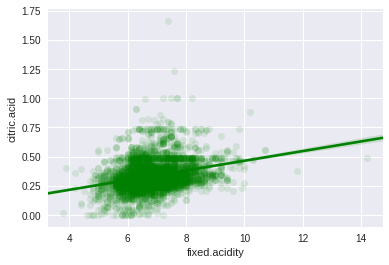

In [35]:
sns.regplot(x = 'fixed.acidity',y='citric.acid',data = df,scatter_kws={'alpha':0.1},color='green')
sns.despine()

The above graph clearly shows that,
1.  pH and Fixed acidity sugar are having correlation coefficient of 0.43.
2.  More the fixed acidity of the wine more is the citric acid it contains.
3.  The wines with fixed acidity have citric acid of amount 0.25 to 0.50. 

# Multivariate Analysis
Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

## Density vs Chlorides in terms of Quality.


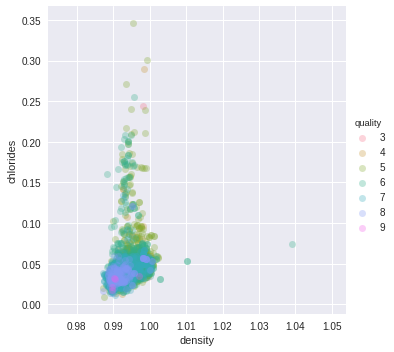

In [36]:
sns.lmplot(x = 'density' , y = 'chlorides' , hue='quality',data = df ,scatter_kws={'alpha':0.3}, fit_reg = False)
sns.despine()

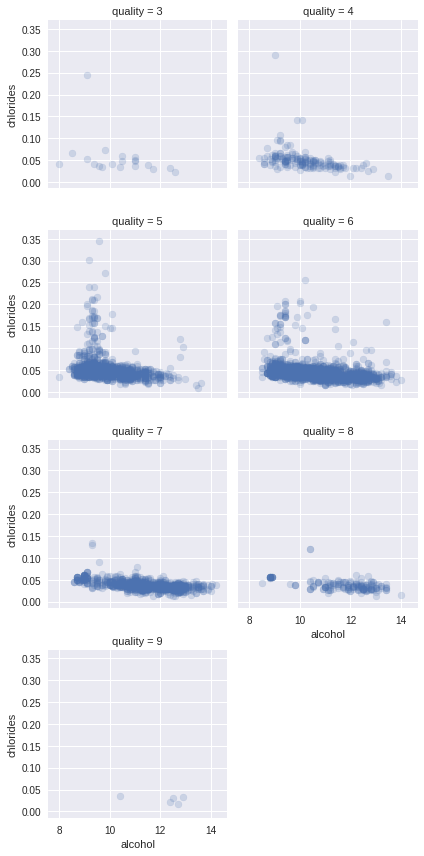

In [37]:


grid = sns.FacetGrid(df, col='quality',col_wrap = 2)
grid.map(plt.scatter,'alcohol','chlorides',alpha = 0.2)
sns.despine()



## Inferences from the Above Alcohol vs Chlorides in terms of Quality plot.
From the above Facet plots, we came that the average quality wines have a high density as compare to good and bad quality wines. And high quality wines have high alcohol contents.

## Alcohol v/s pH in terms of quality


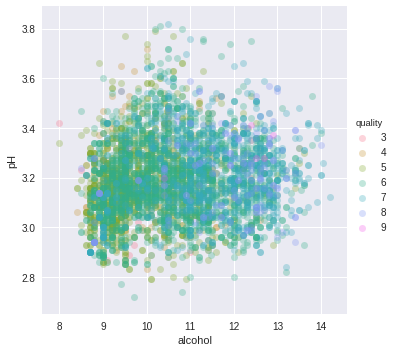

In [38]:
sns.lmplot(x = 'alcohol' , y = 'pH' , hue='quality',data = df ,scatter_kws={'alpha':0.3}, fit_reg = False)
sns.despine()


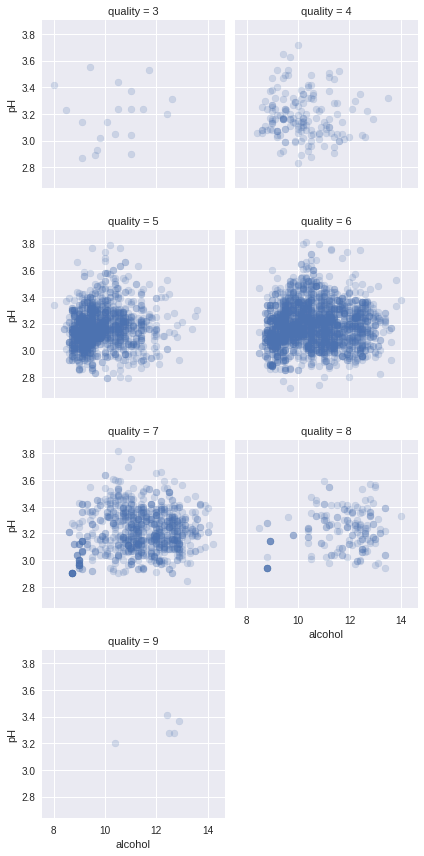

In [39]:
grid = sns.FacetGrid(df, col='quality',col_wrap = 2)
grid.map(plt.scatter,'alcohol','pH',alpha = 0.2)
sns.despine()

## Inferences from the Above Alcohol vs pH in terms of Quality plot.
From the above Facet plots, it can be easily observed that with the increase of the wine quality, both the pH value of the wine and the alcohol content also increase. And the most of the wine produced is of quality 5.

## Sulphates v/s Chlorides in terms of quality

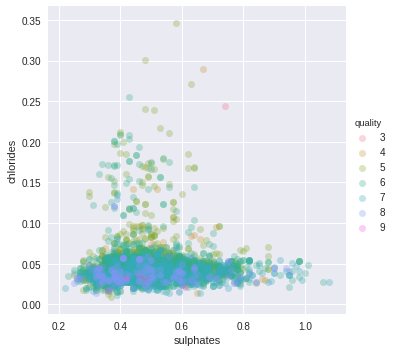

In [40]:
sns.lmplot(x = 'sulphates' , y = 'chlorides' , hue='quality',data = df ,scatter_kws={'alpha':0.3}, fit_reg = False)
sns.despine()


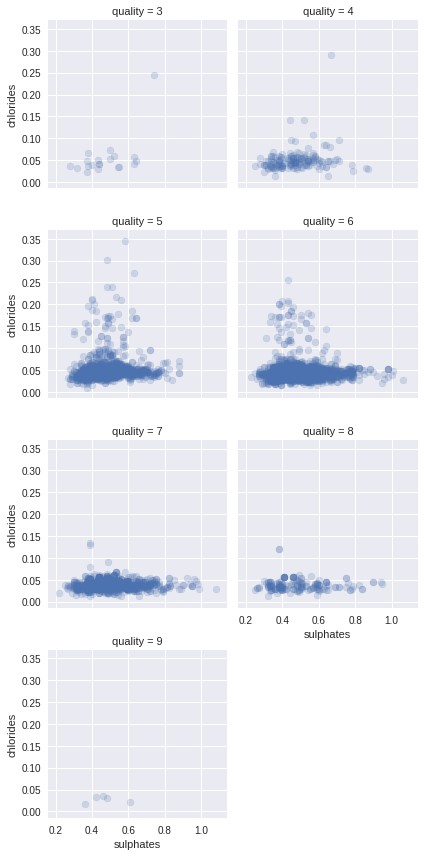

In [41]:
grid = sns.FacetGrid(df, col='quality',col_wrap = 2)
grid.map(plt.scatter,'sulphates','chlorides',alpha = 0.2)
sns.despine()

## Inferences from the Above Sulphates vs Chlorides in terms of Quality plot.
From the above Facet plots, it can be easily observed that with the increase of the wine quality, the amount of sulphates in the wine also increase. However, no difference is observed in terms of chlorides.

# Final Plot Section
Following are the three plots which gives full analysis.

## Alcohol v/s Quality

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


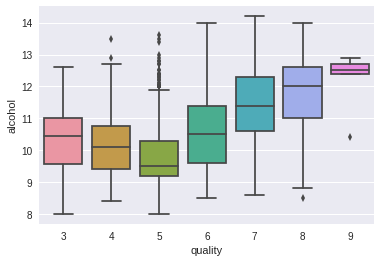

In [42]:
sns.boxplot(x="quality", y = "alcohol",data=df)
sns.despine()

### Inferences from the Above Alcohol vs Quality in terms of Quality plot.
From the above plot, it is clear that the better the quality of the wine the more alcohol it contains. Also the 5 quality wine has alcohol 9-11% and quality 6 wine has 9 to 13 %. Most of the wines are of 5 and 6 quality and alcohol % above 9.We can also see that quality 3 and quality 9 has lesser and greater amount of alcohol in there wine, respectively.

## pH v/s Fixed Acidity

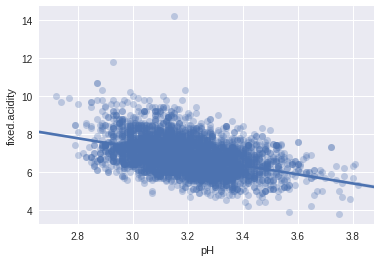

In [43]:
sns.regplot(x="pH", y = "fixed.acidity",data=df, scatter_kws={'alpha':0.3})
sns.despine()

### Inferences from the Above pH v/s Fixed Acidity plot.
From the above plot we can say that the pH and Fixed acidity sugar are having correlation coefficient of 0.43. The lesser the fixed acidity of the wine greater will be its pH value. Most of the wins have pH values between 3 to 3.4 and fixed acidity 5 to 8.

## Alcohol v/s pH in terms of quality

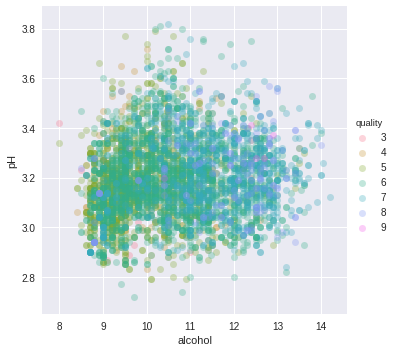

In [44]:
sns.lmplot(x = 'alcohol' , y = 'pH' , hue='quality',data = df ,scatter_kws={'alpha':0.3}, fit_reg = False)
sns.despine()

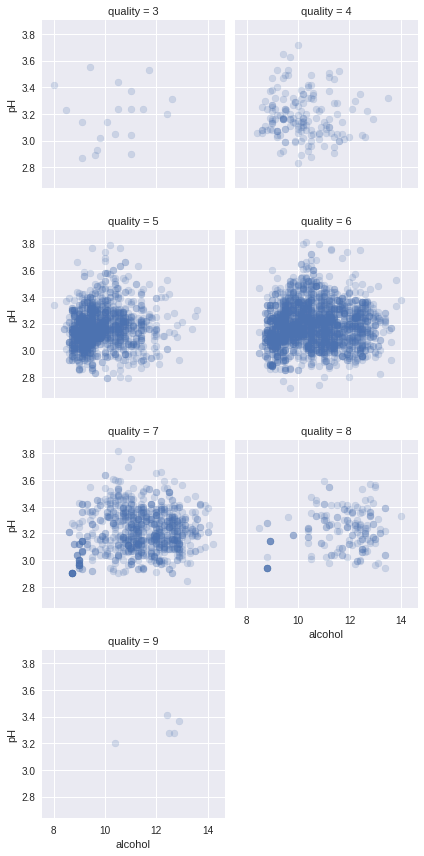

In [45]:
grid = sns.FacetGrid(df, col='quality',col_wrap = 2)
grid.map(plt.scatter,'alcohol','pH',alpha = 0.2)
sns.despine()

### Inferences from the Above Alcohol vs pH in terms of Quality plot.
From the above Facet plots, it can be easily observed that with the increase of the wine quality, both the pH value of the wine and the alcohol content also increase. And the most of the wine produced is of quality 5.

# Summary
From the above analysis it is concluded that if a wine is having greater amount of alcohol and greater pH value then we can say that the wine is of higher quality. On the other, if the wine has higher amount of Fixed Acidity, then it contains more amount of Citric Acid but it may not be a high quality wine. Furthermore, we can also determine the quality of the wine by the amount of sulphates as quality directly depends on the amount of sulphates whereas, it is difficult to tell about the quality of the wine from the amount of chlorides as it does not has any particular trend with the quality. The density can tell whether a wine is of average quality but it can not tell about high or low qualities. Also, the high density wines have high amount of residual sugar. Further, we came to know that the most amount wine was of 6 quality i.e average quality wine and contains 10 - 11% alcohol.